#### Necessary Imports

In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join

### Task 1: Merge 12 Months of sales data into single file

In [2]:
# read one file in
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

# declare dataframe that will contain all data
allData = pd.DataFrame()

# read all files into list
filesList = [f for f in listdir("./Sales_Data/") if isfile(join("./Sales_Data", f))]

# loop through list and add each file in list to dataframe
for file in filesList:
    currFile = pd.read_csv("./Sales_Data/" + file)
    allData = pd.concat([allData,currFile])

allData.to_csv("alldata.csv", index=False)

#### Read in concatenated file

In [3]:
allData = pd.read_csv("alldata.csv")
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Clean Up Data
- Remove column headers and NaN values
- Make each column correct type

In [4]:
# remove NaN values
allData = allData.dropna(how='all')
# remove headers
allData = allData[allData['Order Date'].str[0:2] != 'Or']

# cast correct types
allData['Quantity Ordered'] = pd.to_numeric(allData['Quantity Ordered']) # make int
allData['Price Each'] = pd.to_numeric(allData['Price Each']) # make float

### Augment Data with additional columns:
One for month, Total Price

In [5]:
# integer month column using first two digits of Order Date column
allData['Month'] = allData['Order Date'].str[0:2]
allData['Month'] = allData['Month'].astype('int32')
# total price column using quantity and price
allData['Total'] = allData['Quantity Ordered'] * allData['Price Each']
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Generate new dataframe
- group by month and sum the total, also count number of orders per month

In [6]:
monthlySales = allData.groupby(['Month']).sum()
monthlySales['Number of Sales'] = allData.groupby(['Month']).size()
monthlySales

,Quantity Ordered,Price Each,Total,Number of Sales
Month,,,,
1,10903,1.811768e+06,1.822257e+06,9709
2,13449,2.188885e+06,2.202022e+06,11975
3,17005,2.791208e+06,2.807100e+06,15153
4,20558,3.367671e+06,3.390670e+06,18279
5,18667,3.135125e+06,3.152607e+06,16566
6,15253,2.562026e+06,2.577802e+06,13554
7,16072,2.632540e+06,2.647776e+06,14293
8,13448,2.230345e+06,2.244468e+06,11961
9,13109,2.084992e+06,2.097560e+06,11621


#### Plot Data with matplotlib

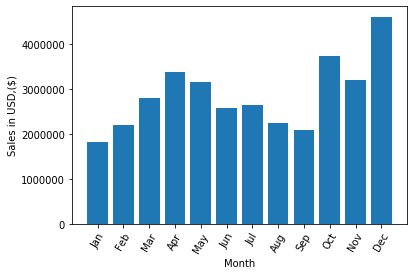

In [7]:
import matplotlib.pyplot as plt
import calendar as cal

months = [cal.month_abbr[i] for i in range(1,13)]

plt.bar(months, monthlySales['Total'])
plt.xticks(months, rotation='60')
plt.xlabel("Month")
plt.ylabel("Sales in USD,($)")
plt.show()

#### Question 2: what city had the highest number of sales?

##### Add city column to allData

In [8]:
# get city and state abbv
def getAddress(string):
    address = string.split(',')
    return address[1] + ',' + address[2][0:3]
allData['City'] = allData['Purchase Address'].apply(lambda x: getAddress(x))
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


##### Get sales grouped by city name

In [9]:
citySales = allData.groupby(['City']).size()
citySales = citySales.to_frame("Num Sales").reset_index()
citySales2 = allData.groupby(['City']).sum().reset_index().drop(columns=['Quantity Ordered','Price Each','City'])
citySales['Total'] = citySales2
citySales

ValueError: Wrong number of items passed 2, placement implies 1

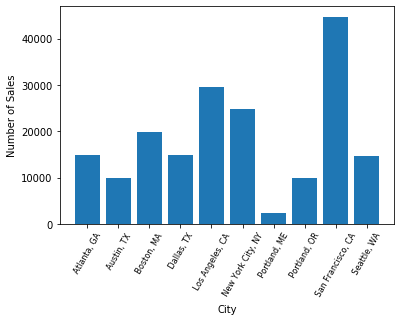

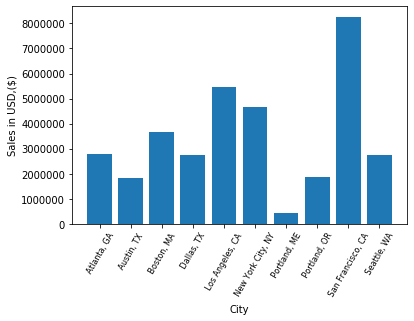

In [82]:
cities = citySales['City'].to_list()
plt.bar(cities, citySales['Num Sales'])
plt.xticks(cities, rotation='60', size=8)
plt.xlabel("City")
plt.ylabel("Number of Sales")
plt.show()

plt.bar(cities, citySales['Total'])
plt.xticks(cities, rotation='60', size=8)
plt.xlabel("City")
plt.ylabel("Sales in USD,($)")
plt.show()



#### Question 3: What time of day/ day of the week should advertisements be used more effectively to maximize the likelihood of a customer making a transaction?

- get time of day
- get day of the week

In [10]:
from datetime import datetime as dt
# get time of day and add column to allData
def getTime(string):
    dateTime = dt.strptime(string,"%m/%d/%y %H:%M")
    time = dateTime.strftime("%H:%M")
    return time
def getDay(string):
    dateTime = dt.strptime(string,"%m/%d/%y %H:%M")
    day = dateTime.strftime("%A")
    return day
allData['Time'] = allData['Order Date'].apply(lambda x: getTime(x))
allData['Day'] = allData['Order Date'].apply(lambda x: getDay(x))
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Time,Day
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",00:01,Monday
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",07:03,Sunday
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18:21,Thursday
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15:13,Sunday
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12:38,Wednesday


In [12]:
# now get time interval

timeSales = allData.groupby(allData.Time.str[0:2]).sum().reset_index()

# print sales grouped by day of the week (all the same)
weeklySales = allData.groupby(['Day']).sum().reset_index()
weeklySales['Number of Sales'] = allData.groupby(['Day']).size()
timeSales.head()
#weeklySales

,Time,Quantity Ordered,Price Each,Month,Total
0,00,4428,709296.70,27554,713721.27
1,01,2619,458490.00,16657,460866.88
2,02,1398,233833.64,8507,234851.44
3,03,928,144726.42,5904,145757.89
4,04,937,162058.18,6148,162661.01


##### Plot the data on a bar graph

In [1]:
hour = timeSales['Time'].to_list()
plt.bar(hour, timeSales['Total'])
plt.xticks(hour, rotation='60', size=8)
plt.xlabel("Time of Day")
plt.ylabel("Sales in USD,($)")
plt.show()

day = weeklySales['Day'].to_list()
plt.bar(day, weeklySales['Total'])
plt.xticks(day, rotation='60', size=8)
plt.xlabel("Day of the week")
plt.ylabel("Sales in USD,($)")
plt.show()

NameError: name 'timeSales' is not defined

In [14]:
# only want rows with multiple items in order
boughtTogether = allData[allData['Order ID'].duplicated(keep=False)]

# create dataframe where columns are order id and a 'list' of items in the order
boughtTogether['Items List'] = boughtTogether.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
boughtTogether = boughtTogether[['Order ID', 'Items List']].drop_duplicates()
boughtTogether.head()

/Users/nicholas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Items List
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [15]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

c = Counter()

# loop through each order
for i in boughtTogether['Items List']:
    rowList = i.split(',')
    c.update(combinations(rowList,2))

# make dataframe of top 10 most common
commonPurchases = pd.DataFrame(c.most_common(10),columns=['Items', '# of Appearances'])
commonPurchases

,Items,# of Appearances
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",160
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92


#### What product sold the most? Why?

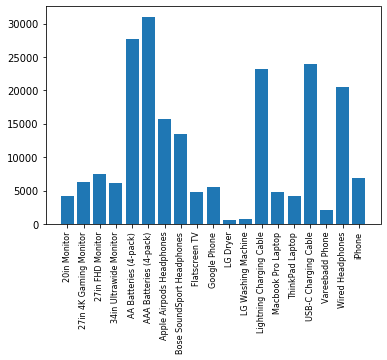

In [16]:
# group allData by name of product and count the amount ordered
totalProduct = allData.groupby(['Product']).sum()['Quantity Ordered'].reset_index()

products = totalProduct['Product'].tolist()
plt.bar(products, totalProduct['Quantity Ordered'])
plt.xticks(products, rotation='90', size=8)
plt.show()

In [17]:
# plot two sets of data on single plot
prices = allData.groupby(['Product']).mean()['Price Each'].reset_index()
totalProduct.insert(1,'Price',prices['Price Each'])

In [19]:
totalProduct

,Product,Price,Quantity Ordered
0,20in Monitor,109.99,4129
1,27in 4K Gaming Monitor,389.99,6244
2,27in FHD Monitor,149.99,7550
3,34in Ultrawide Monitor,379.99,6199
4,AA Batteries (4-pack),3.84,27635
5,AAA Batteries (4-pack),2.99,31017
6,Apple Airpods Headphones,150.00,15661
7,Bose SoundSport Headphones,99.99,13457
8,Flatscreen TV,300.00,4819
9,Google Phone,600.00,5532


/Users/nicholas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


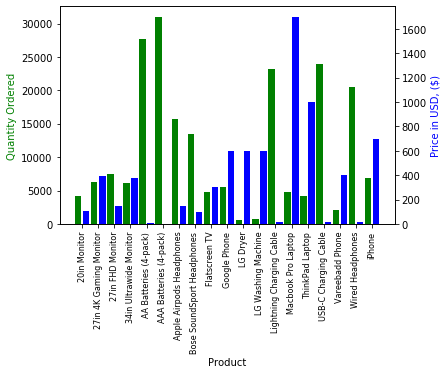

In [39]:
import numpy as np
fig, ax = plt.subplots()

ind = np.arange(19)
w = 0.4

ax2 = ax.twinx()
ax.bar(ind - 0.25, totalProduct['Quantity Ordered'], w, color='g')
ax2.bar(ind + 0.25, totalProduct['Price'], w, color='b')

ax.set_xlabel('Product')
ax.set_xticks(ind)
ax.set_xticklabels(products, rotation='90', size=8)
ax.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in USD, ($)', color='b')


fig.show()